Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

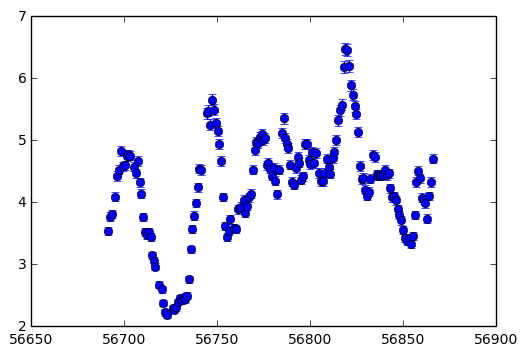

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/6439A.lc"

dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqd




array([ 0.00964867,  0.02886003,  0.0556922 ,  0.08632291,  0.13380051,
        0.20739079,  0.32145572,  0.49825637])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

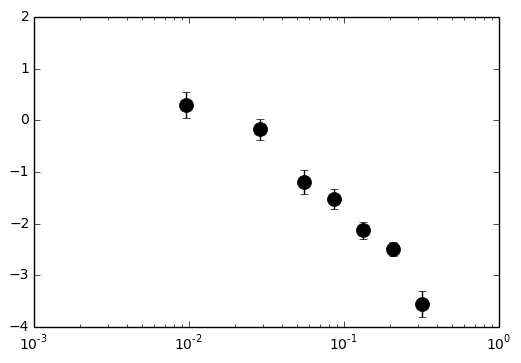

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

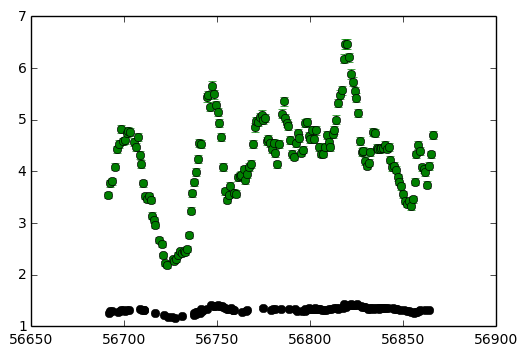

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.345e-01 5.367e+01 inf -- -2.331e+02 -- 1 1 1 1 1 1 1 1
   2 7.681e-01 5.318e+01 6.465e+01 -- -1.684e+02 -- 0.582708 0.565919 0.567071 0.565455 0.565472 0.567054 0.565985 0.567541
   3 3.306e+00 5.243e+01 6.380e+01 -- -1.046e+02 -- 0.185981 0.132028 0.135218 0.13138 0.131144 0.134919 0.132269 0.135939
   4 1.864e+00 5.146e+01 6.266e+01 -- -4.198e+01 -- -0.181134 -0.300836 -0.294737 -0.302717 -0.302476 -0.296396 -0.30108 -0.294221
   5 5.957e-01 5.034e+01 6.140e+01 -- 1.942e+01 -- -0.518821 -0.728805 -0.721808 -0.738858 -0.734893 -0.72747 -0.734418 -0.722812
   6 3.763e-01 4.873e+01 5.988e+01 -- 7.930e+01 -- -0.826205 -1.14111 -1.14324 -1.17897 -1.16599 -1.15914 -1.16891 -1.15053
   7 2.737e-01 4.601e+01 5.715e+01 -- 1.365e+02 -- -1.07976 -1.51457 -1.54719 -1.6226 -1.59467 -1.59132 -1.60536 -1.57616
   8 2.126e-01 4.210e+01 5.222e+01 -- 1.887e+02 -- -1.22751 -1.79949 -1.90925 -2.06669 -2.0187 -2.02254 -2.04251 -1.99341
   9 1.708e-01 3.838e+01 4.572e+01 -- 2.344e+02 -- -1.23813 -1

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 3.523e+02 3.519e+02 -6.866e-01 -4.554e-01 0.735 +++
+++ 3.523e+02 3.515e+02 -6.866e-01 -3.398e-01 1.52 +++
+++ 3.523e+02 3.517e+02 -6.866e-01 -3.976e-01 1.11 +++
+++ 3.523e+02 3.518e+02 -6.866e-01 -4.265e-01 0.915 +++
+++ 3.523e+02 3.518e+02 -6.866e-01 -4.121e-01 1.01 +++
+++ 3.523e+02 3.518e+02 -6.866e-01 -4.193e-01 0.962 +++
+++ 3.523e+02 3.518e+02 -6.866e-01 -4.157e-01 0.986 +++
+++ 3.523e+02 3.518e+02 -6.866e-01 -4.139e-01 0.999 +++
	### errors for param 1 ###
+++ 3.523e+02 3.518e+02 -1.611e+00 -1.404e+00 0.91 +++
+++ 3.523e+02 3.513e+02 -1.611e+00 -1.300e+00 1.93 +++
+++ 3.523e+02 3.516e+02 -1.611e+00 -1.352e+00 1.38 +++
+++ 3.523e+02 3.517e+02 -1.611e+00 -1.378e+00 1.13 +++
+++ 3.523e+02 3.518e+02 -1.611e+00 -1.391e+00 1.02 +++
+++ 3.523e+02 3.518e+02 -1.611e+00 -1.397e+00 0.964 +++
+++ 3.523e+02 3.518e+02 -1.611e+00 -1.394e+00 0.992 +++
	### errors for param 2 ###
+++ 3.523e+02 3.518e+02 -2.882e+00 -2.608e+00 0.933 +++
+++ 3.523e+02 3.513e+02 -2.8

<Container object of 3 artists>

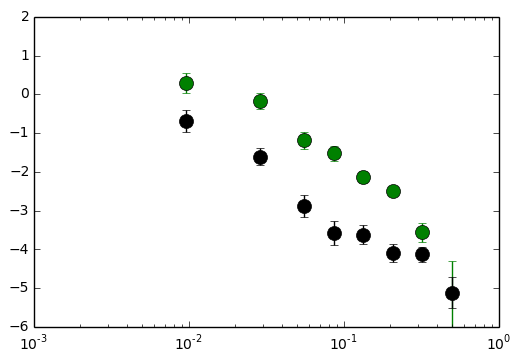

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 9.080e+02 8.628e+00 inf -- 3.946e+02 -- -0.492976 -1.19479 -2.33614 -2.85309 -3.17738 -3.59122 -4.14664 -6.86153 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 2.942e+01 1.064e+01 2.632e+00 -- 3.972e+02 -- -0.481238 -1.16249 -2.32998 -2.86236 -3.17204 -3.5971 -4.23481 -6.56153 0.196538 0.194241 0.217236 0.210439 0.208644 0.19838 0.076294 2.89715
   5 7.015e+01 1.272e+01 2.261e+00 -- 3.995e+02 -- -0.466455 -1.13277 -2.31839 -2.86564 -3.1624 -3.59969 -4.33223 -6.86153 0.280457 0.266919 0.318442 0.315419 0.302037 0.289194 0.0452378 0.657906
   7 1.553e+02 1.490e+01 1.934e+00 -- 4.014e+02 -- -0.450147 -1.10622 -2.30366 -2.86384 -3.15036 -3.59968 -4.44186 -6.56153 0.351939 0.32391 0.403816 0.412369 0.381156 0.372195 0.00381962 2.32595
   9 7.337e+01 1.721e+01 1.703e+00 -- 4.031e+02 -- -0.433442 -1.08282 -2.28754 -2.85817 -3.13723 -3.59775 -4.56867 -6.86153 0.41207 0.369439 0.474927 0.499989 0.447819 0.447139 -0.0555143 2.71453
  11 2.642e+02 1.966e+01 1.517e+00 -- 4.046e+02 -- -0.417104 -1.0623 

In [11]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


	### errors for param 0 ###
+++ 4.199e+02 4.196e+02 -2.495e-01 -2.326e-01 0.408 +++
+++ 4.199e+02 4.192e+02 -2.495e-01 -2.242e-01 1.23 +++
+++ 4.199e+02 4.195e+02 -2.495e-01 -2.284e-01 0.733 +++
+++ 4.199e+02 4.194e+02 -2.495e-01 -2.263e-01 0.956 +++
+++ 4.199e+02 4.193e+02 -2.495e-01 -2.252e-01 1.09 +++
+++ 4.199e+02 4.193e+02 -2.495e-01 -2.257e-01 1.02 +++
+++ 4.199e+02 4.194e+02 -2.495e-01 -2.260e-01 0.988 +++
+++ 4.199e+02 4.194e+02 -2.495e-01 -2.259e-01   1 +++
	### errors for param 1 ###
+++ 4.199e+02 4.197e+02 -9.086e-01 -9.045e-01 0.351 +++
+++ 4.199e+02 4.194e+02 -9.086e-01 -9.025e-01   1 +++
	### errors for param 2 ###
+++ 4.199e+02 4.197e+02 -2.073e+00 -2.056e+00 0.357 +++
+++ 4.199e+02 4.192e+02 -2.073e+00 -2.047e+00 1.24 +++
+++ 4.199e+02 4.195e+02 -2.073e+00 -2.051e+00 0.685 +++
+++ 4.199e+02 4.194e+02 -2.073e+00 -2.049e+00 0.93 +++
+++ 4.199e+02 4.193e+02 -2.073e+00 -2.048e+00 1.08 +++
+++ 4.199e+02 4.194e+02 -2.073e+00 -2.049e+00   1 +++
	### errors for param 3 ###
+++ 

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 11.83713905,   3.53860689,   2.58807242,   2.14608694,
         1.11886842,   0.91105232,  -1.54142564,   0.32978838])

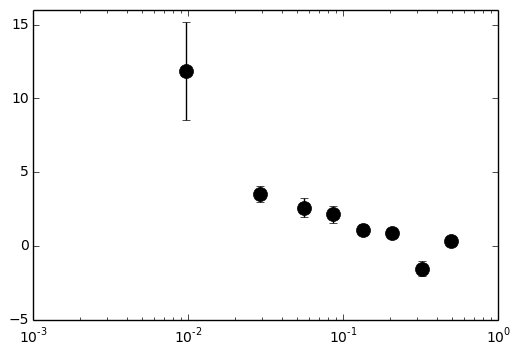

In [17]:


xscale('log'); ylim(-5,16)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

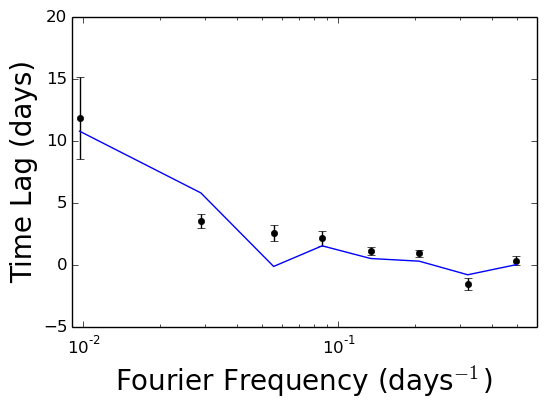

In [96]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

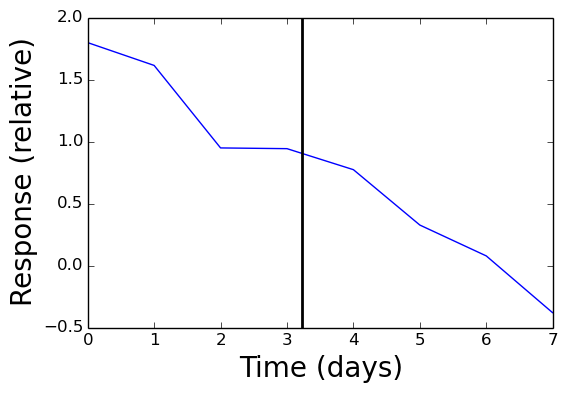

In [97]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([3.22,3.22], [-50, 50], color='k', linestyle='-', linewidth=2)


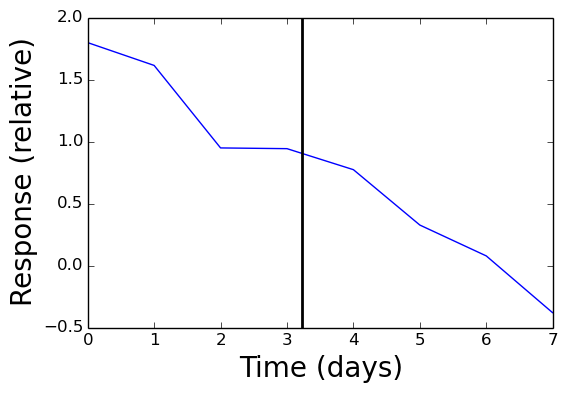

In [98]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([3.22,3.22], [-50, 50], color='k', linestyle='-', linewidth=2)